This shows that a given parameter set gives the correct output checking both the solution of the linear system as well as the steady-state of the ode system.

In [4]:
import numpy as np
import sys, os
import matplotlib.pyplot as plt
from scipy.integrate import odeint
sys.path.append("/Users/rosamartinezcorral/OneDrive - CRG - Centre de Regulacio Genomica/papers/github_repos/splicing_sensitivity")
import auxfuncs_fitting
sysfunc=auxfuncs_fitting.psi_linear_system1

def get_vars_sim_pprod_deg(vars_,t,parset,x):
    #print("conc is", x)
    
    p,ps,pr,psr,e,i=vars_
    delta=1
    alpha0,c1,c2,c3_,c4,c7_,c8_,ke,kes,kis,kisr_=parset
    c3=c3_*x
    c5=c3
    c6=c4
    c7=c1*c7_
    c8=c2*c8_
    kesr=kes
    kisr=kis*kisr_
    dp=-(ke+c1+c3)*p+c2*ps+c4*pr+alpha0
    dps=c1*p-(c2+c5+kes+kis)*ps+c6*psr
    dpr=c3*p-(c4+c7+ke)*pr+c8*psr
    dpsr=c5*ps+c7*pr-(c6+c8+kesr+kisr)*psr
    de=ke*p+ke*pr+kes*ps+kesr*psr-delta*e
    di=kisr*psr+kis*ps-delta*i
    return [dp,dps,dpr,dpsr,de,di]

In [5]:
pars=np.array([0.7257912426374832,1.4257538053925203,1.7,-4.76598932095625,-1.674089841521799,-0.19906159449053992,-0.3713316718106093,-0.4940317217007246,-0.9890844360104907,-1.4014173176938498,-1.3453508337904019,-1.7678584051379225,-1.5904788856372647,5.0,4.85082022933757,-1.9885488580514825,-2.087695916707471,0.9400133323182909,0.5424725389578614,1.5579590261231824,1.4787917641044184,-2.6136398972873125,-4.23095741139613,5.0,5.0,-3.422240470334431,-5.0,0.45809821647237203,-0.3665910628292926,-2.0758430240856787,-0.8561227991778365,-1.6141527666332323,-0.8833165727554204,3.6541492516224046,0.5717666368281058,-2.501758811287929,-5.0,-3.957105700298184,-2.678463559186319,-3.9984928539761415,-3.2917737547472194,-3.6801133006917444,-3.2228579746628716,-4.027902848921229,-3.3057021570758924,-5.0,-1.553057674525401,-4.428132050162499,-3.564896829133412,-4.999998591739146,-3.3306674196482873,-5.0,-5.0,-4.376843699988723,-3.629462217697537,-5.0,-5.0,-3.445859000210762,5.0,-5.0,-3.3502812141430063,-4.27209927314742,-2.426730185010765,0.15368733815408317])

parsetnames="LOW,MID,HIGH,alpha0,c1,c2:WTendo-LS,c2:WTendo-HS,c2:WTminigene-LS,c2:WTminigene-HS,c2:U1cons-LS,c2:U1cons-HS,c2:U6cons-LS,c2:U6cons-HS,c2:GTtoGC5ss-LS,c2:GTtoGC5ss-HS,c2:BP_stg1-LS,c2:BP_stg1-HS,c2:BP_weak3-LS,c2:BP_weak3-HS,c2:Py-weak3-LS,c2:Py-weak3-HS,c2:BP_stg1;Py-stg3-LS,c2:BP_stg1;Py-stg3-HS,c2:BP_weak3;Py-weak3-LS,c2:BP_weak3;Py-weak3-HS,c2:BP_stg1;Py-stg3;U1cons-LS,c2:BP_stg1;Py-stg3;U1cons-HS,c2:-ESS2-3-LS,c2:-ESS2-3-HS,c2:-ESE2-5-LS,c2:-ESE2-5-HS,c3_,c4,c7,c8,ke,kes,kis:WTendo-LS,kis:WTendo-HS,kis:WTminigene-LS,kis:WTminigene-HS,kis:U1cons-LS,kis:U1cons-HS,kis:U6cons-LS,kis:U6cons-HS,kis:GTtoGC5ss-LS,kis:GTtoGC5ss-HS,kis:BP_stg1-LS,kis:BP_stg1-HS,kis:BP_weak3-LS,kis:BP_weak3-HS,kis:Py-weak3-LS,kis:Py-weak3-HS,kis:BP_stg1;Py-stg3-LS,kis:BP_stg1;Py-stg3-HS,kis:BP_weak3;Py-weak3-LS,kis:BP_weak3;Py-weak3-HS,kis:BP_stg1;Py-stg3;U1cons-LS,kis:BP_stg1;Py-stg3;U1cons-HS,kis:-ESS2-3-LS,kis:-ESS2-3-HS,kis:-ESE2-5-LS,kis:-ESE2-5-HS,kisr_".split(",")
parsetnames=np.asarray(parsetnames)
groups=[x.split(":")[1] for x in parsetnames if "c2" in x and "LS" in x] #get the names of each group tried
groups

['WTendo-LS',
 'WTminigene-LS',
 'U1cons-LS',
 'U6cons-LS',
 'GTtoGC5ss-LS',
 'BP_stg1-LS',
 'BP_weak3-LS',
 'Py-weak3-LS',
 'BP_stg1;Py-stg3-LS',
 'BP_weak3;Py-weak3-LS',
 'BP_stg1;Py-stg3;U1cons-LS',
 '-ESS2-3-LS',
 '-ESE2-5-LS']

WTendo-LS
['LOW' 'MID' 'HIGH' 'alpha0' 'c1' 'c2:WTendo-LS' 'c3_' 'c4' 'c7' 'c8' 'ke'
 'kes' 'kis:WTendo-LS' 'kisr_']
16
linalg
0.11721593469327152 [0.11721593]
dif is [3.81783494e-12]
----
linalg
1.193352988204271 [1.19335299]
dif is [1.43662859e-13]
----
linalg
6.098587640439012 [6.09858764]
dif is [3.03019831e-11]
----
linalg
28.81023421467732 [28.81023422]
dif is [6.14690521e-09]
----
linalg
43.640000067366074 [43.64000007]
dif is [4.01229272e-10]
----


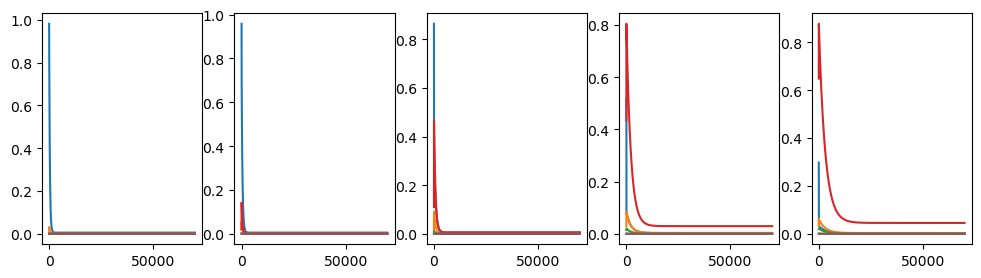

WTminigene-LS
['LOW' 'MID' 'HIGH' 'alpha0' 'c1' 'c2:WTminigene-LS' 'c3_' 'c4' 'c7' 'c8'
 'ke' 'kes' 'kis:WTminigene-LS' 'kisr_']
16
linalg
0.209920427159493 [0.20992043]
dif is [5.49851831e-12]
----
linalg
1.3709399054811888 [1.37093991]
dif is [3.35997896e-12]
----
linalg
7.175003565343433 [7.17500356]
dif is [2.27279173e-09]
----
linalg
36.96124097586074 [36.96124097]
dif is [1.01518864e-08]
----
linalg
54.707500435406025 [54.70750012]
dif is [3.11885877e-07]
----


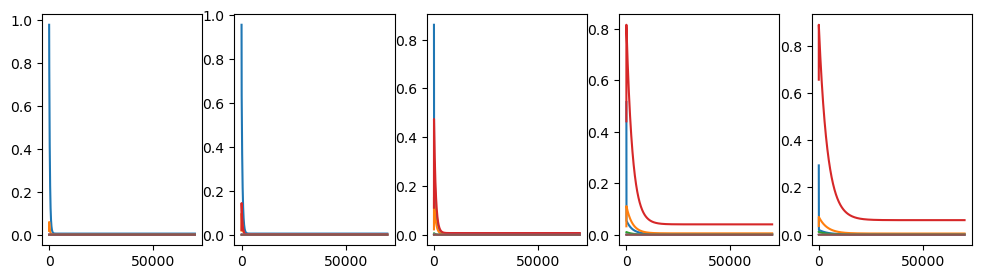

U1cons-LS
['LOW' 'MID' 'HIGH' 'alpha0' 'c1' 'c2:U1cons-LS' 'c3_' 'c4' 'c7' 'c8' 'ke'
 'kes' 'kis:U1cons-LS' 'kisr_']
16
linalg
3.3950947842449706 [3.39509478]
dif is [6.7796746e-10]
----
linalg
10.062638285174335 [10.0626383]
dif is [1.52770117e-08]
----
linalg
39.77749986038124 [39.77749986]
dif is [3.82215148e-10]
----
linalg
85.91795409880206 [85.9179541]
dif is [1.52932955e-09]
----
linalg
91.9550000995129 [91.9550001]
dif is [2.67110067e-09]
----


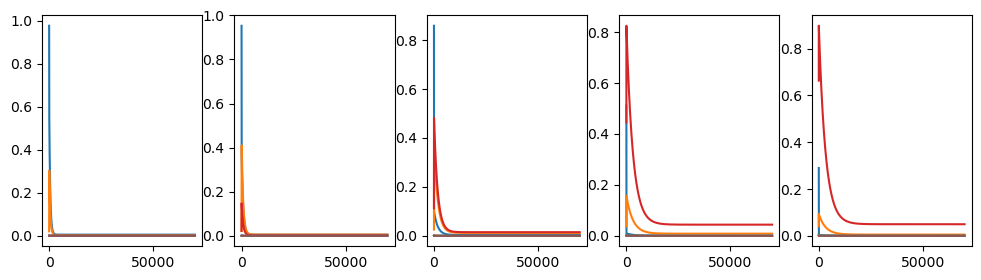

U6cons-LS
['LOW' 'MID' 'HIGH' 'alpha0' 'c1' 'c2:U6cons-LS' 'c3_' 'c4' 'c7' 'c8' 'ke'
 'kes' 'kis:U6cons-LS' 'kisr_']
16
linalg
3.529307395659626 [3.5293074]
dif is [3.74225095e-11]
----
linalg
9.583254998012213 [9.58325498]
dif is [1.41314178e-08]
----
linalg
38.24250006850672 [38.24250001]
dif is [5.40607772e-08]
----
linalg
82.97233724041239 [82.97226235]
dif is [7.48915821e-05]
----
linalg
88.61506263209318 [88.61499961]
dif is [6.30225411e-05]
----


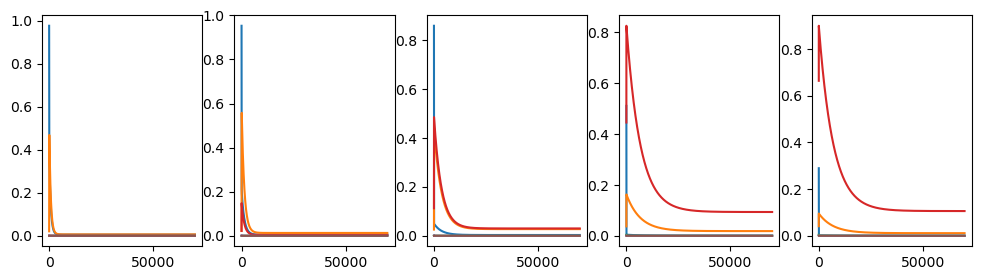

GTtoGC5ss-LS
['LOW' 'MID' 'HIGH' 'alpha0' 'c1' 'c2:GTtoGC5ss-LS' 'c3_' 'c4' 'c7' 'c8'
 'ke' 'kes' 'kis:GTtoGC5ss-LS' 'kisr_']
16
linalg
6.724638908697129e-08 [6.72463891e-08]
dif is [0.]
----
linalg
1.7841864808675552e-05 [1.78418648e-05]
dif is [7.62668466e-18]
----
linalg
5.6906056904038434e-05 [5.69060569e-05]
dif is [1.35525272e-19]
----
linalg
9.597544096641697e-05 [9.5975441e-05]
dif is [1.14627275e-16]
----
linalg
0.00010434092630651834 [0.00010434]
dif is [1.13299127e-17]
----


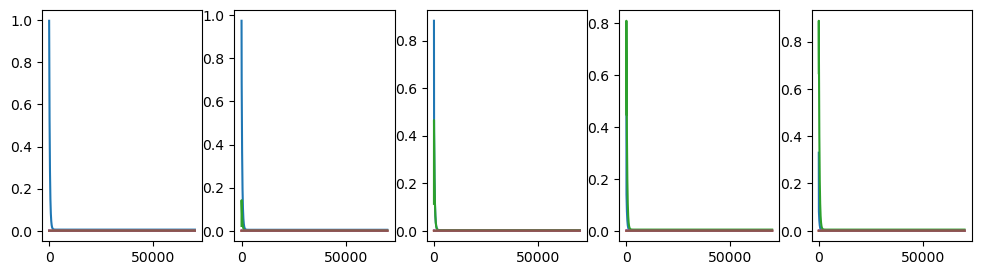

BP_stg1-LS
['LOW' 'MID' 'HIGH' 'alpha0' 'c1' 'c2:BP_stg1-LS' 'c3_' 'c4' 'c7' 'c8'
 'ke' 'kes' 'kis:BP_stg1-LS' 'kisr_']
16
linalg
2.3599075226838324 [2.35990752]
dif is [2.77888823e-11]
----
linalg
6.347808459991853 [6.34780846]
dif is [2.98523872e-09]
----
linalg
27.95008917410913 [27.95]
dif is [8.91775797e-05]
----
linalg
72.02805807732368 [72.02031051]
dif is [0.00774757]
----
linalg
78.71177087889451 [78.70607855]
dif is [0.00569232]
----


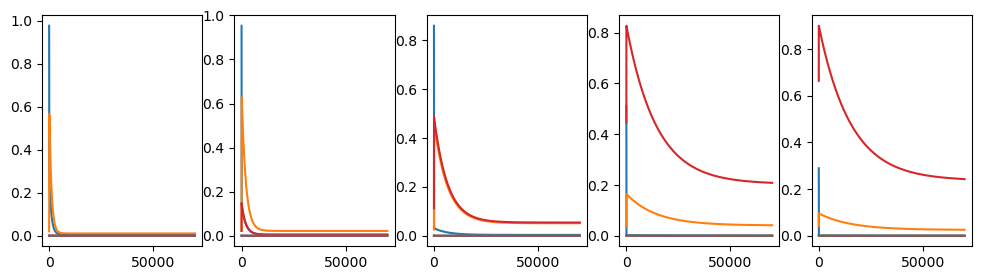

BP_weak3-LS
['LOW' 'MID' 'HIGH' 'alpha0' 'c1' 'c2:BP_weak3-LS' 'c3_' 'c4' 'c7' 'c8'
 'ke' 'kes' 'kis:BP_weak3-LS' 'kisr_']
16
linalg
0.0007720569599771742 [0.00077206]
dif is [2.16840434e-19]
----
linalg
0.061029939299824164 [0.06102994]
dif is [1.2298218e-12]
----
linalg
0.2699100290083044 [0.26991003]
dif is [1.02734488e-12]
----
linalg
0.7525563364276745 [0.75255634]
dif is [1.67549308e-11]
----
linalg
0.9500000105808049 [0.95000001]
dif is [3.61033425e-12]
----


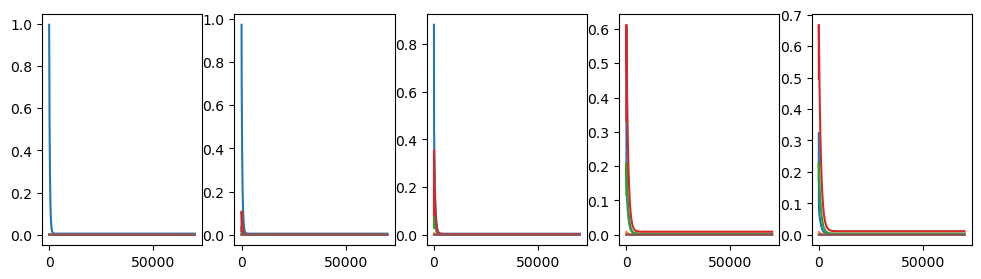

Py-weak3-LS
['LOW' 'MID' 'HIGH' 'alpha0' 'c1' 'c2:Py-weak3-LS' 'c3_' 'c4' 'c7' 'c8'
 'ke' 'kes' 'kis:Py-weak3-LS' 'kisr_']
16
linalg
0.00018608359468406789 [0.00018608]
dif is [2.71050543e-20]
----
linalg
0.031278802541020015 [0.0312788]
dif is [4.70457007e-14]
----
linalg
0.116656903543322 [0.1166569]
dif is [2.10387263e-14]
----
linalg
0.23737213104657484 [0.23737213]
dif is [3.15386606e-13]
----
linalg
0.27000000086215487 [0.27]
dif is [6.6685546e-13]
----


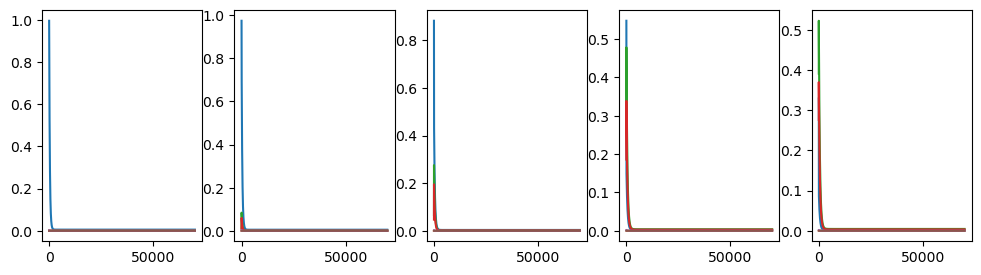

BP_stg1;Py-stg3-LS
['LOW' 'MID' 'HIGH' 'alpha0' 'c1' 'c2:BP_stg1;Py-stg3-LS' 'c3_' 'c4' 'c7'
 'c8' 'ke' 'kes' 'kis:BP_stg1;Py-stg3-LS' 'kisr_']
16
linalg
9.957368284862124 [9.95736827]
dif is [1.01840527e-08]
----
linalg
22.460053761875272 [22.46]
dif is [5.37598896e-05]
----
linalg
57.90509572292253 [57.89339767]
dif is [0.01169806]
----
linalg
81.9211331073057 [81.91201846]
dif is [0.00911465]
----
linalg
83.98509772566311 [83.98000161]
dif is [0.00509612]
----


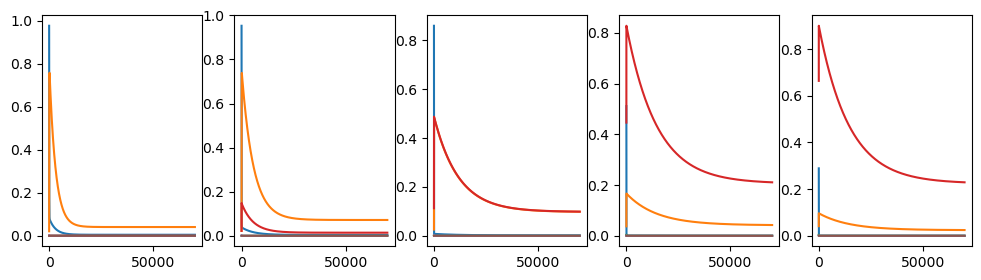

BP_weak3;Py-weak3-LS
['LOW' 'MID' 'HIGH' 'alpha0' 'c1' 'c2:BP_weak3;Py-weak3-LS' 'c3_' 'c4'
 'c7' 'c8' 'ke' 'kes' 'kis:BP_weak3;Py-weak3-LS' 'kisr_']
16
linalg
6.724638908697129e-08 [6.72463891e-08]
dif is [0.]
----
linalg
1.7841864808675552e-05 [1.78418648e-05]
dif is [7.62668466e-18]
----
linalg
5.6906056904038434e-05 [5.69060569e-05]
dif is [1.35525272e-19]
----
linalg
9.597544096641697e-05 [9.5975441e-05]
dif is [1.14627275e-16]
----
linalg
0.00010434092630651834 [0.00010434]
dif is [1.13299127e-17]
----


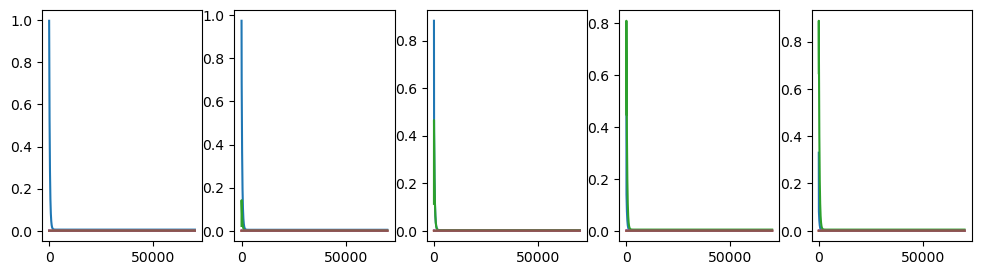

BP_stg1;Py-stg3;U1cons-LS
['LOW' 'MID' 'HIGH' 'alpha0' 'c1' 'c2:BP_stg1;Py-stg3;U1cons-LS' 'c3_'
 'c4' 'c7' 'c8' 'ke' 'kes' 'kis:BP_stg1;Py-stg3;U1cons-LS' 'kisr_']
16
linalg
74.75000090548335 [74.75]
dif is [9.05483475e-07]
----
linalg
86.57828219839404 [86.57828216]
dif is [3.57839838e-08]
----
linalg
94.89604566145806 [94.89604569]
dif is [2.94955385e-08]
----
linalg
97.44807453223827 [97.44807453]
dif is [1.92905247e-09]
----
linalg
97.74293680560619 [97.7429368]
dif is [3.87667853e-09]
----


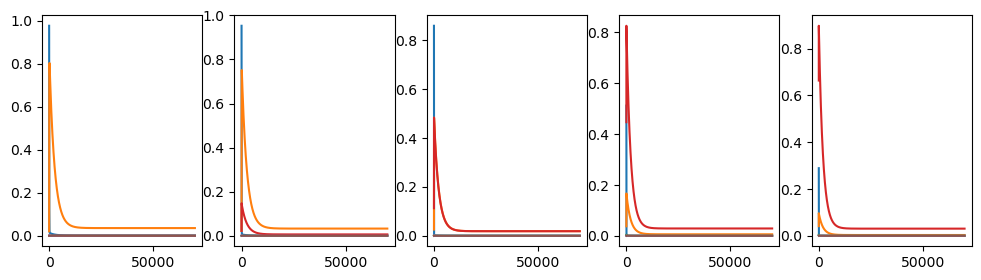

-ESS2-3-LS
['LOW' 'MID' 'HIGH' 'alpha0' 'c1' 'c2:-ESS2-3-LS' 'c3_' 'c4' 'c7' 'c8'
 'ke' 'kes' 'kis:-ESS2-3-LS' 'kisr_']
16
linalg
0.0023417869817948006 [0.00234179]
dif is [8.54351312e-17]
----
linalg
0.07953315473521021 [0.07953315]
dif is [4.91134911e-14]
----
linalg
0.39058601548777483 [0.39058602]
dif is [1.39343537e-11]
----
linalg
1.5069056338259006 [1.50690563]
dif is [2.03259631e-11]
----
linalg
2.2200000067196117 [2.22000001]
dif is [8.60520544e-11]
----


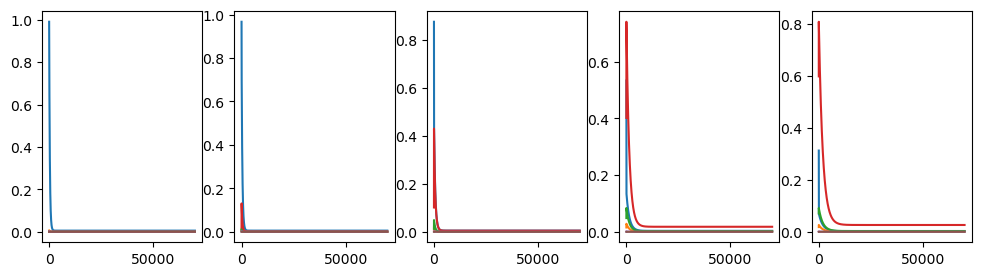

-ESE2-5-LS
['LOW' 'MID' 'HIGH' 'alpha0' 'c1' 'c2:-ESE2-5-LS' 'c3_' 'c4' 'c7' 'c8'
 'ke' 'kes' 'kis:-ESE2-5-LS' 'kisr_']
16
linalg
4.043704543066073 [4.04370453]
dif is [1.26063968e-08]
----
linalg
10.464635875228836 [10.46463589]
dif is [1.14913945e-08]
----
linalg
39.700113202477546 [39.70000015]
dif is [0.00011305]
----
linalg
80.0416055017432 [80.03865014]
dif is [0.00295536]
----
linalg
84.72396898704135 [84.72198376]
dif is [0.00198523]
----


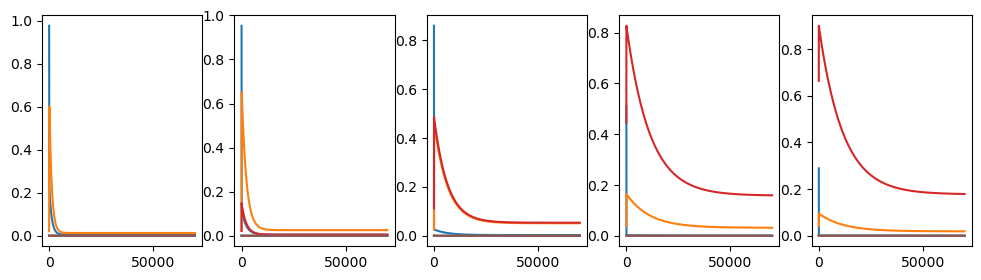

In [9]:
#ratenames=np.array(['alpha0', 'c1', 'c2', 'c3_', 'c4', 'c7', 'c8', 'ke', 'kes', 'kis', 'kisr_'])
for group in groups:
    print(group)
    selected_idxs=[i for i in range(len(parsetnames)) if ((not ":" in parsetnames[i]) or ("c2:%s"%group ==parsetnames[i]) or ("kis:%s"%group==parsetnames[i]))]
    print(parsetnames[selected_idxs])
    parset=10**np.array([pars[i] for i in selected_idxs])
    parset=np.concatenate((np.array([0,1]),parset))
    print(len(parset))
    
    xvals=parset[0:5]
    tol=1e-2 #tolerance to assess convergence of integration
    
    tvec=np.arange(0,70000,0.1)
    curves=[]
    vars_=[1,0,0,0,0,0]

    
    yvals=[]
    variable_vars=np.zeros((len(xvals),5))
    
    fig,axes=plt.subplots(1,5,figsize=(12,3))
    for x_,x in enumerate(xvals):
        out=odeint(get_vars_sim_pprod_deg,vars_,tvec,args=(parset[5:],x))
        #print("ode",out[-1])
        ax=axes[x_]
        ax.plot(tvec[10:],out[10:])
        
        I=out[-1,-1]
        E=out[-1,-2]
        psi=100*I/(I+E)
        print("linalg")
        out2=sysfunc(parset[5:],x)
        print(psi,out2)

        print("dif is", np.abs(psi-out2))
        print("----")
    plt.show()
    
    